In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
eco_df = pd.read_excel ('..\Data\TEIS-NSS Project Data 10-2022.xlsx', sheet_name='ECO with Exit21-22')    

In [3]:
elig_df = pd.read_excel ('..\Data\TEIS-NSS Project Data 10-2022.xlsx', sheet_name = 'Elig Timeline Rpt 2018-2022') 

In [4]:
eco_elig_df = pd.merge(eco_df, elig_df, how="outer", left_on= "CHILD_ID", right_on='Child ID')

In [5]:
eco_elig_check = eco_elig_df['OC1 Data Check'].isin([1.0])
EEC1 = pd.DataFrame(eco_elig_df[eco_elig_check])

EEC1.shape

(5595, 98)

In [6]:
EEC1['Exit Reason_y'].value_counts().sum()

5572

In [7]:
EEC1['Exit Reason_y'].value_counts()

618 - Part B eligible                                                   1741
618 - Part B eligibility not determined                                 1577
618 - Parent withdraw                                                   1134
618 - Not eligible for Part B – Exit with referral to other programs     308
618 - Attempts to contact unsuccessful                                   299
618 - Not eligible for Part B – Exit with no referrals                   298
618 - Moved out of state                                                 148
618 - Completion of IFSP/ no longer requires services                     57
618 - Deceased                                                            10
Name: Exit Reason_y, dtype: int64

In [8]:
DE = EEC1[EEC1['Init. Elig. Category'] == 'Developmental Evaluation']
DE_count = pd.DataFrame(DE['Exit Reason_y'].value_counts())
#Part B eligible, #1

In [9]:
DE['Exit Reason_y'].value_counts().sum()

4058

In [10]:
DC = EEC1[EEC1['Init. Elig. Category'] == 'Diagnosed Condition']
DC_count = pd.DataFrame(DC['Exit Reason_y'].value_counts())
#Part B eligibility not determined, #1

In [11]:
DC['Exit Reason_y'].value_counts().sum()

664

In [12]:
DC_DE = EEC1[EEC1['Init. Elig. Category'] == 'Diagnosed Condition, Developmental Evaluation']
DC_DE_count = pd.DataFrame(DC_DE['Exit Reason_y'].value_counts())
# Part B eligible, #1
#Parent withdraw was #3 for all 

In [13]:
DC_DE['Exit Reason_y'].value_counts().sum()

849

In [14]:
num = [4058, 664, 849]
sum(num)
#there are 23 nulls kid so if you count those 5594 

5571

In [15]:
DE_count = pd.DataFrame(DE_count.reset_index())
DE_count.rename (columns = {'index':'Exit Reason: Description','Exit Reason_y':'Exit Reason: Count'}, inplace=True)
DE_count

,Exit Reason: Description,Exit Reason: Count
0,618 - Part B eligible,1318
1,618 - Part B eligibility not determined,1182
2,618 - Parent withdraw,780
3,618 - Not eligible for Part B – Exit with no r...,231
4,618 - Not eligible for Part B – Exit with refe...,227
5,618 - Attempts to contact unsuccessful,185
6,618 - Moved out of state,93
7,618 - Completion of IFSP/ no longer requires s...,38
8,618 - Deceased,4


In [16]:
DE_count['Exit Reason: Description'] = DE_count['Exit Reason: Description'].str.strip('618 - ')
DE_count

,Exit Reason: Description,Exit Reason: Count
0,Part B eligible,1318
1,Part B eligibility not determined,1182
2,Parent withdraw,780
3,Not eligible for Part B – Exit with no referrals,231
4,Not eligible for Part B – Exit with referral t...,227
5,Attempts to contact unsuccessful,185
6,Moved out of state,93
7,Completion of IFSP/ no longer requires services,38
8,Deceased,4


In [17]:
DC_count = pd.DataFrame(DC_count.reset_index())
DC_count.rename (columns = {'index':'Exit Reason: Description','Exit Reason_y':'Exit Reason: Count'}, inplace=True)
DC_count

DC_count['Exit Reason: Description'] = DC_count['Exit Reason: Description'].str.strip('618 - ')
DC_count

,Exit Reason: Description,Exit Reason: Count
0,Part B eligibility not determined,183
1,Part B eligible,172
2,Parent withdraw,156
3,Attempts to contact unsuccessful,52
4,Not eligible for Part B – Exit with referral t...,36
5,Not eligible for Part B – Exit with no referrals,33
6,Moved out of state,19
7,Completion of IFSP/ no longer requires services,12
8,Deceased,1


In [18]:
DC_DE_count = pd.DataFrame(DC_DE_count.reset_index())
DC_DE_count.rename (columns = {'index':'Exit Reason: Description','Exit Reason_y':'Exit Reason: Count'}, inplace=True)
DC_DE_count

DC_DE_count['Exit Reason: Description'] = DC_DE_count['Exit Reason: Description'].str.strip('618 - ')
DC_DE_count

,Exit Reason: Description,Exit Reason: Count
0,Part B eligible,250
1,Part B eligibility not determined,212
2,Parent withdraw,198
3,Attempts to contact unsuccessful,62
4,Not eligible for Part B – Exit with referral t...,45
5,Moved out of state,36
6,Not eligible for Part B – Exit with no referrals,34
7,Completion of IFSP/ no longer requires services,7
8,Deceased,5


## VISUALIZATIONS

In [46]:
merged = pd.merge(DC_DE_count, DC_count, how = "outer", on = 'Exit Reason: Description')
all_cat = pd.merge(DE_count, merged, how = "outer", on = 'Exit Reason: Description')
all_cat.rename(columns = {'Exit Reason: Description':'Exit Reason','Exit Reason: Count':'Development Evaluation','Exit Reason: Count_x':'Both', 'Exit Reason: Count_y': 'Diagnosed Condition'}, inplace=True)

In [47]:
all_cat

,Exit Reason,Development Evaluation,Both,Diagnosed Condition
0,Part B eligible,1318,250,172
1,Part B eligibility not determined,1182,212,183
2,Parent withdraw,780,198,156
3,Not eligible for Part B – Exit with no referrals,231,34,33
4,Not eligible for Part B – Exit with referral t...,227,45,36
5,Attempts to contact unsuccessful,185,62,52
6,Moved out of state,93,36,19
7,Completion of IFSP/ no longer requires services,38,7,12
8,Deceased,4,5,1


<AxesSubplot:ylabel='Exit Reason'>

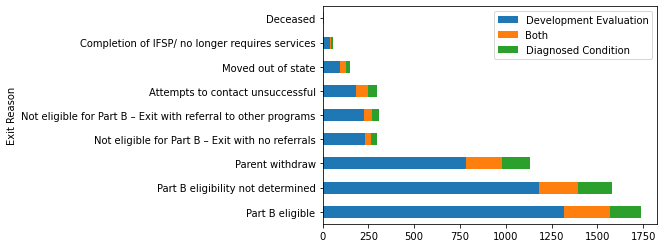

In [50]:
all_cat.set_index('Exit Reason').plot(kind='barh', stacked=True)